In [2]:
import os
dir = os.getcwd()
dir

import pandas as pd
csv_name = 'csv_agileoutgoing_C_London'

csv_list = 'csv_agileoutgoing_C_London.csv'

csv_path = os.path.join(dir, 'data',csv_list)
csv_name= pd.read_csv(csv_path)


In [4]:
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list))

In [7]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']
csv_agileoutgoing_C_London.columns = column_names
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [8]:
csv_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  84671 non-null  object 
 1   time       84671 non-null  object 
 2   Letter     84671 non-null  object 
 3   City       84671 non-null  object 
 4   Price      84671 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


In [17]:
df_agileoutgoing_C_London = pd.DataFrame(csv_agileoutgoing_C_London[['date_time', 'Price']])
df_agileoutgoing_C_London.columns = ['ds', 'y']
df_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      84671 non-null  object 
 1   y       84671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [20]:
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].str.slice(stop=-6)

In [21]:
# Assuming 'ds' column has timezone information
# df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].dt.tz_localize(None)

# Now, convert 'ds' column to datetime without timezone
df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')

In [22]:
df_agileoutgoing_C_London.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


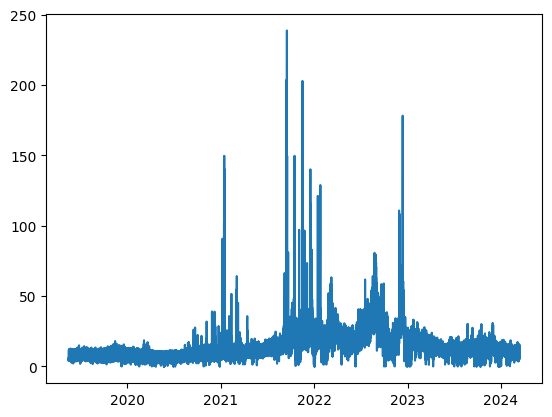

In [23]:
import matplotlib.pyplot as plt

plt.plot(df_agileoutgoing_C_London['ds'], df_agileoutgoing_C_London['y'])
plt.show()

In [24]:
df = df_agileoutgoing_C_London[df_agileoutgoing_C_London['ds']<'2020-07-01 00:00:00']

In [25]:
df.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


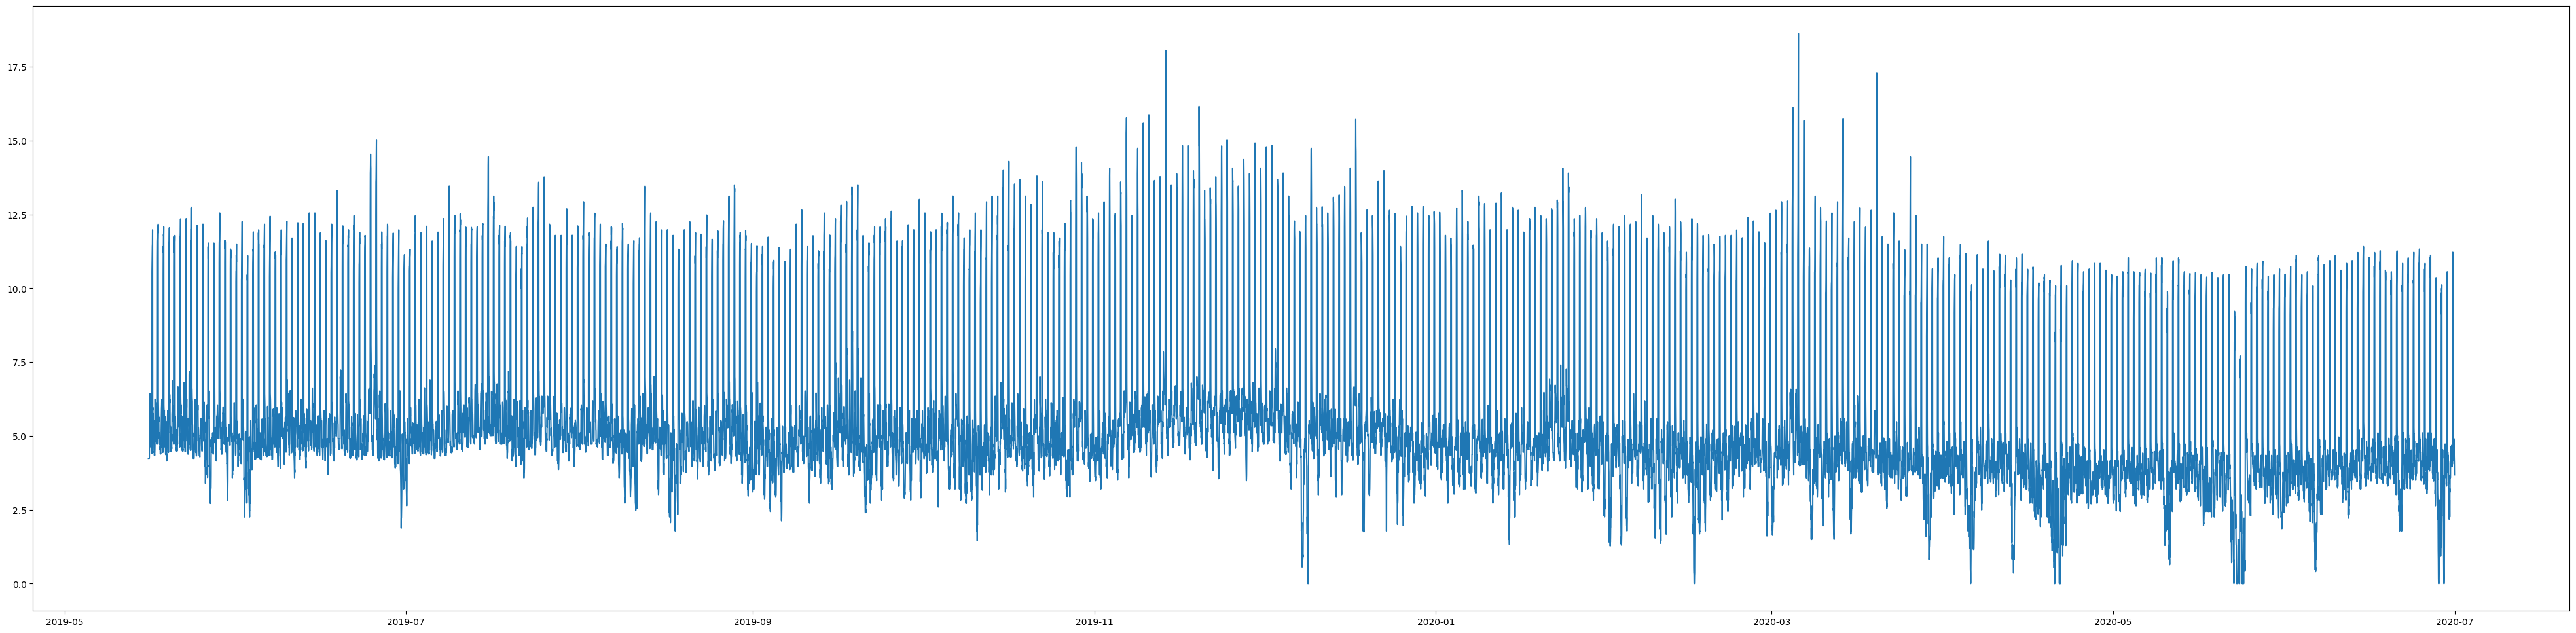

In [78]:
plt.figure(figsize=(50,12))
plt.plot(df['ds'], df['y'])
plt.show()

In [82]:
df['ds'][:10]

0   2019-05-15 23:30:00
1   2019-05-16 00:00:00
2   2019-05-16 00:30:00
3   2019-05-16 01:00:00
4   2019-05-16 01:30:00
5   2019-05-16 02:00:00
6   2019-05-16 02:30:00
7   2019-05-16 03:00:00
8   2019-05-16 03:30:00
9   2019-05-16 04:00:00
Name: ds, dtype: datetime64[ns]

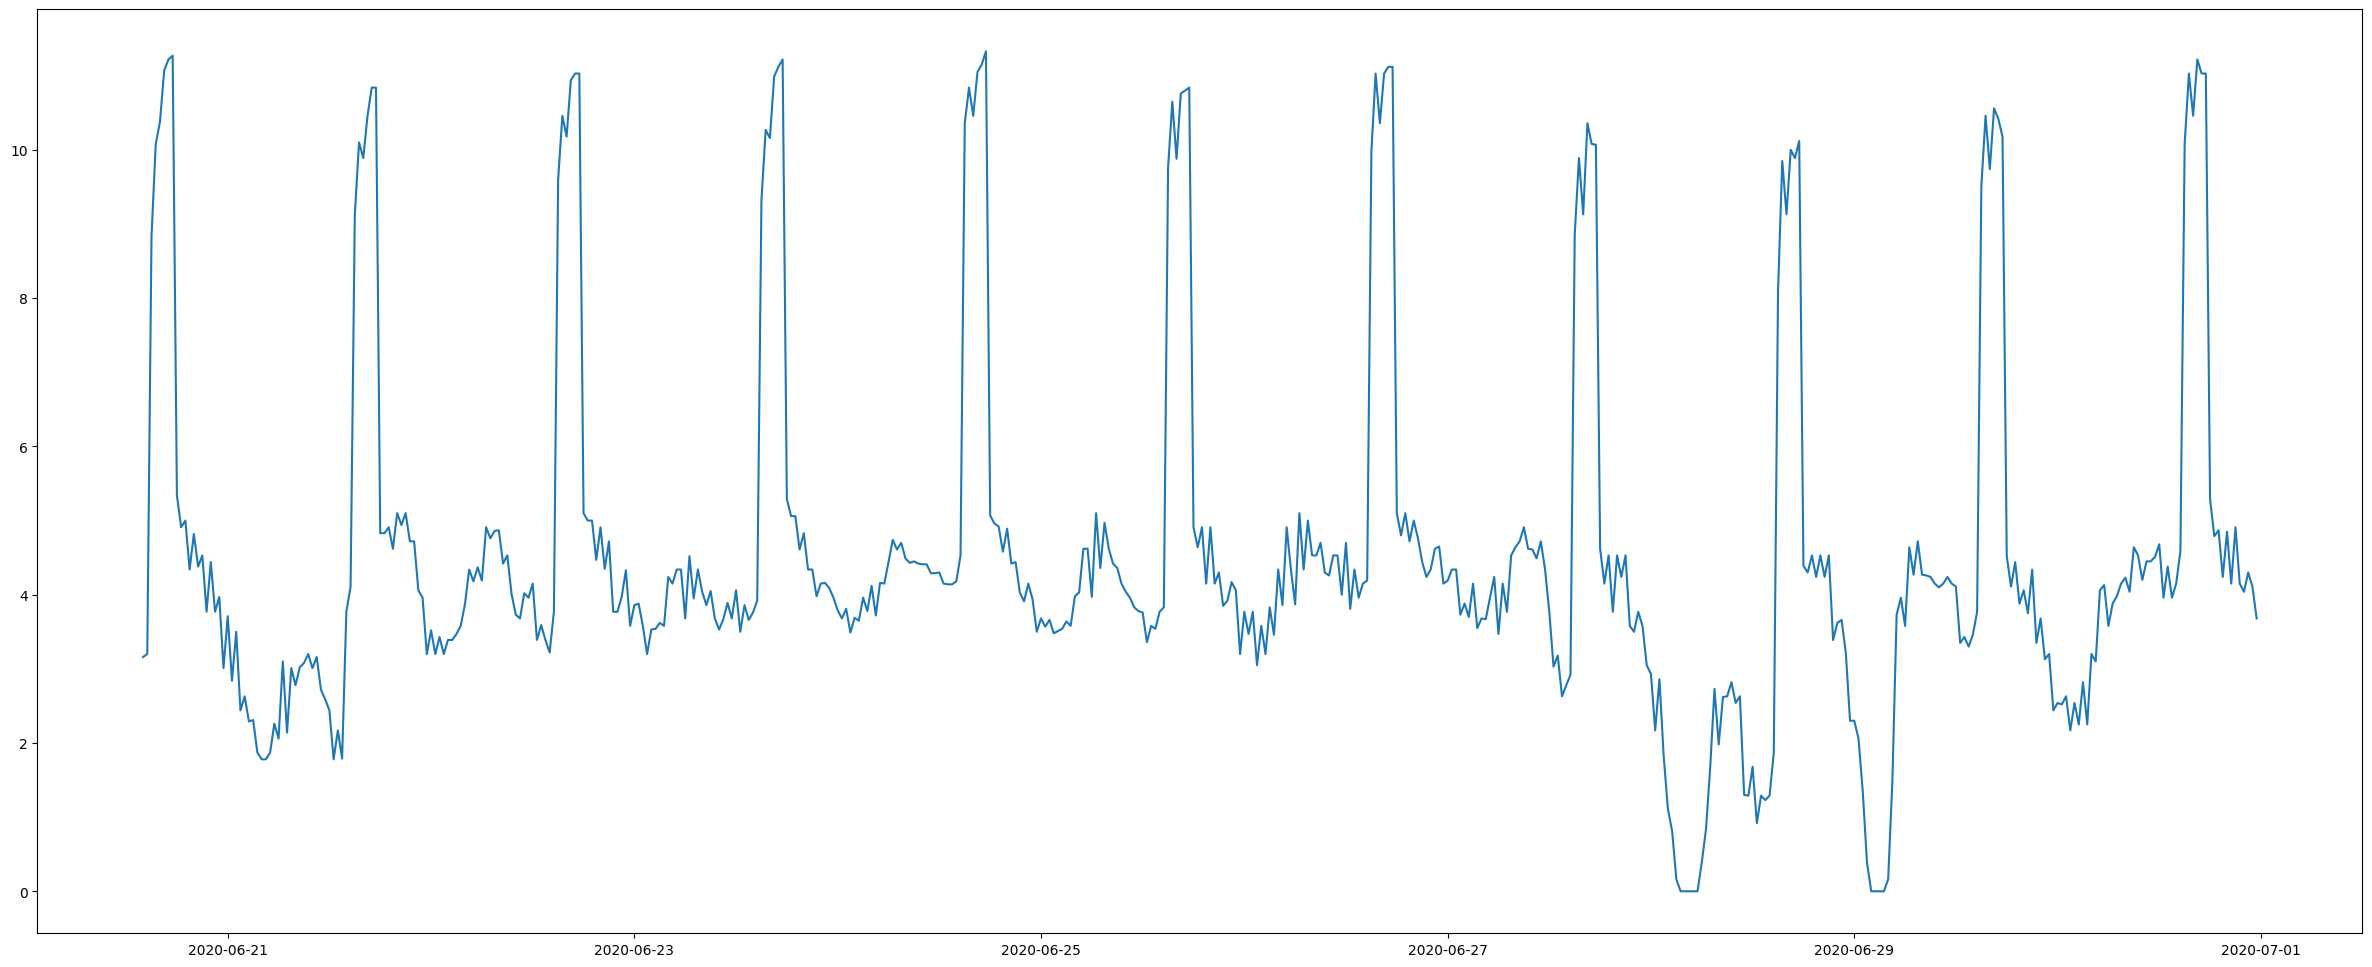

In [84]:
plt.figure(figsize=(30,12))
plt.plot(df['ds'][-500:], df['y'][-500:])
plt.show()

In [27]:
import numpy as np

In [29]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [46]:
split_ratio = round(df.shape[0]*0.9)
split_ratio, df.shape

(17799, (19777, 2))

In [47]:
train = df.iloc[:split_ratio]
test = df.iloc[split_ratio:]

check = len(train)+len(test)
check

19777

In [58]:
train['ds'][0]- train['ds'][len(train)-1]

Timedelta('-371 days +05:00:00')

In [48]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

20:54:31 - cmdstanpy - INFO - Chain [1] start processing
20:54:33 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
horizon = 90

future = model.make_future_dataframe(periods = horizon, freq='D')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17884,2020-08-14 18:30:00,4.991173,1.052952,9.018734
17885,2020-08-15 18:30:00,4.849195,0.881602,8.585535
17886,2020-08-16 18:30:00,4.853523,0.923059,8.809150
17887,2020-08-17 18:30:00,4.976331,0.587840,8.815846
17888,2020-08-18 18:30:00,4.988203,0.518586,9.019158


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


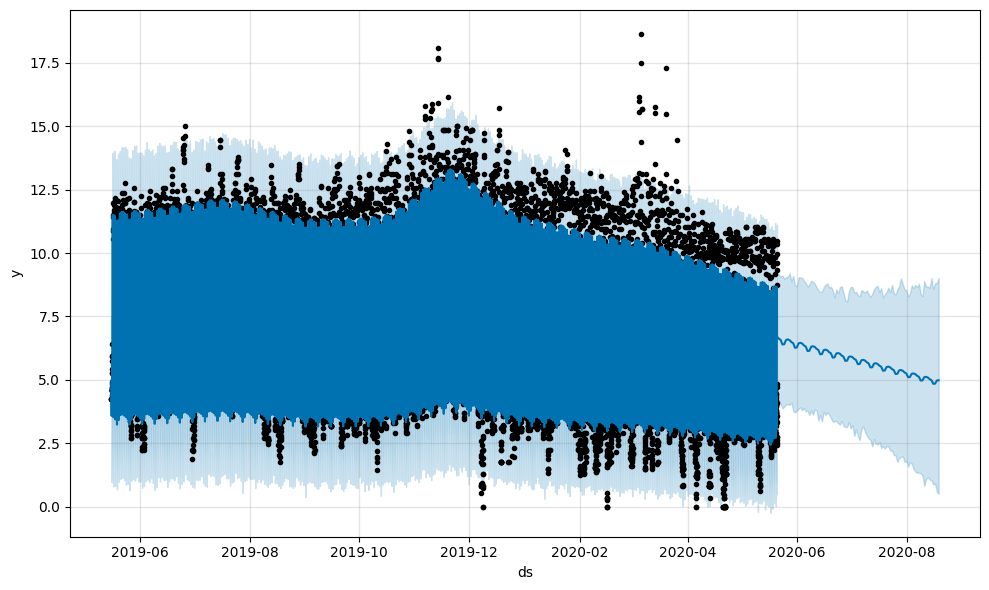

In [66]:
ax = model.plot(forecast)

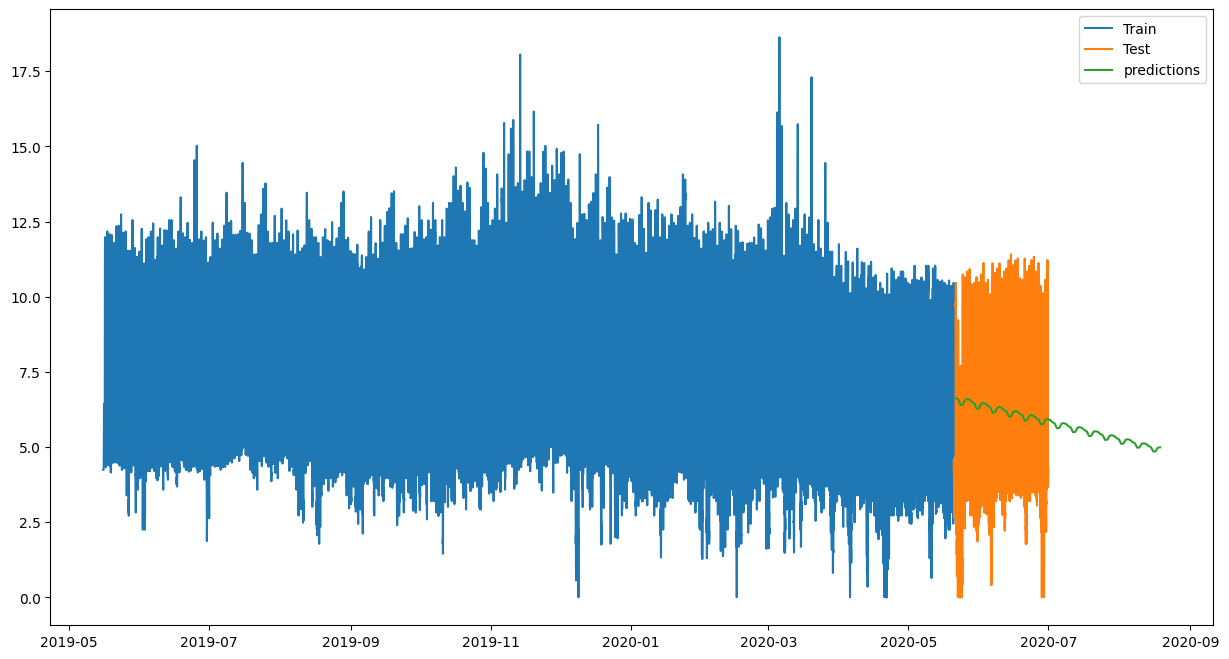

In [67]:
plt.figure(figsize=(15,8))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label='predictions')
plt.legend(loc='best')
plt.show()

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

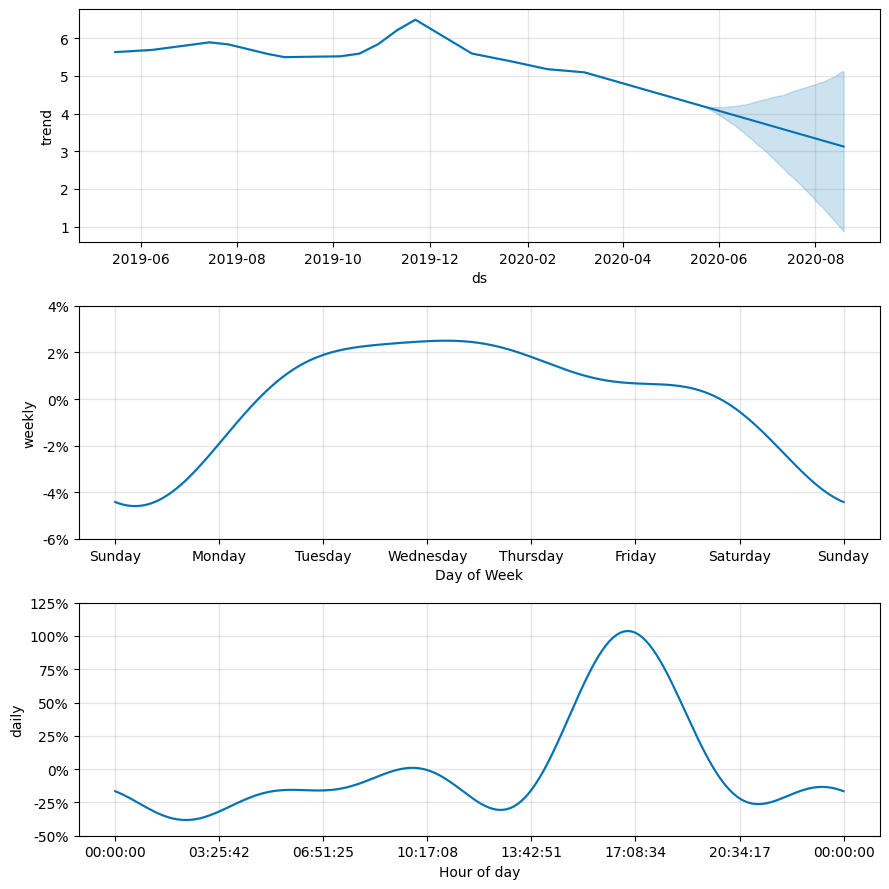

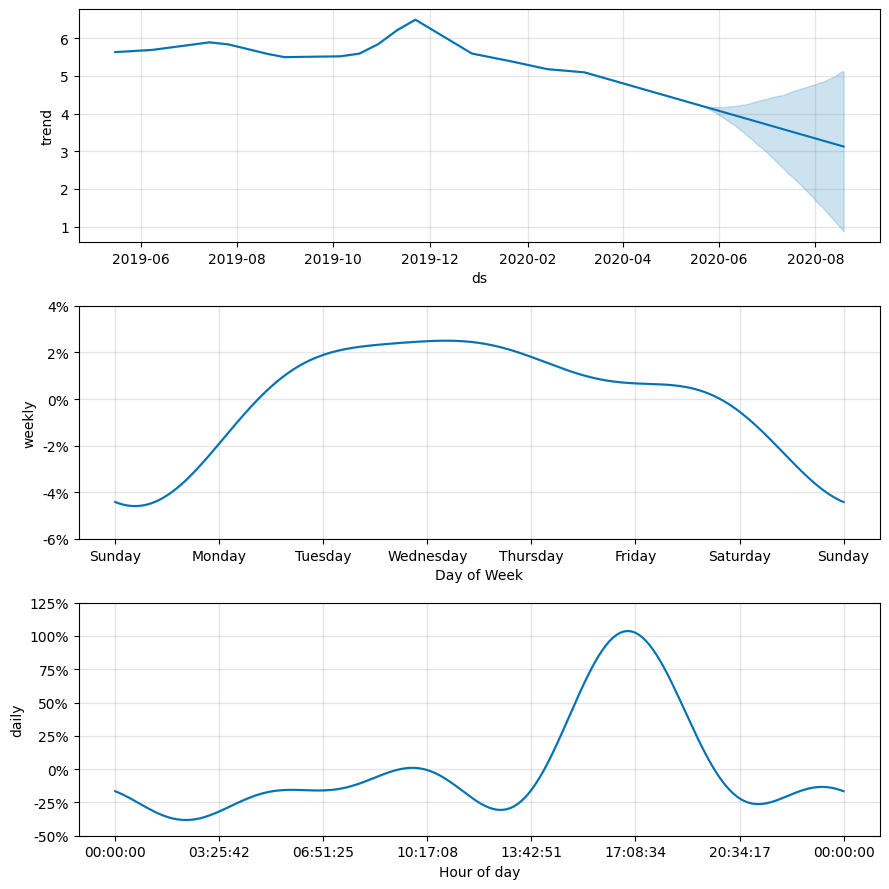

In [68]:
model.plot_components(forecast)

In [69]:
model

In [72]:
df_cv = cross_validation(model = model, initial='180 days', horizon='30 days', period='3 days')

df_p = performance_metrics(df_cv)

  0%|          | 0/54 [00:00<?, ?it/s]21:22:13 - cmdstanpy - INFO - Chain [1] start processing
21:22:13 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/54 [00:01<00:57,  1.09s/it]21:22:14 - cmdstanpy - INFO - Chain [1] start processing
21:22:15 - cmdstanpy - INFO - Chain [1] done processing
  4%|▎         | 2/54 [00:02<00:56,  1.08s/it]21:22:15 - cmdstanpy - INFO - Chain [1] start processing
21:22:15 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 3/54 [00:03<00:50,  1.01it/s]21:22:16 - cmdstanpy - INFO - Chain [1] start processing
21:22:16 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 4/54 [00:04<00:49,  1.02it/s]21:22:17 - cmdstanpy - INFO - Chain [1] start processing
21:22:17 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 5/54 [00:05<00:49,  1.00s/it]21:22:18 - cmdstanpy - INFO - Chain [1] start processing
21:22:19 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 6/54 [00:06<00:50,  1.04s/it]21:22:19

In [73]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-13 19:00:00,7.284230,4.954115,9.524476,9.09,2019-11-13 18:30:00
1,2019-11-13 19:30:00,6.079584,3.779391,8.358292,7.48,2019-11-13 18:30:00
2,2019-11-13 20:00:00,5.251804,3.072214,7.443762,7.00,2019-11-13 18:30:00
3,2019-11-13 20:30:00,4.843722,2.616094,6.962463,6.29,2019-11-13 18:30:00
4,2019-11-13 21:00:00,4.803341,2.676450,7.008904,6.62,2019-11-13 18:30:00


In [74]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
77755,2020-05-20 16:30:00,8.487668,5.872166,11.050385,9.98,2020-04-20 18:30:00
77756,2020-05-20 17:00:00,8.631300,6.269151,11.246251,10.37,2020-04-20 18:30:00
77757,2020-05-20 17:30:00,8.340446,5.584664,10.969611,10.46,2020-04-20 18:30:00
77758,2020-05-20 18:00:00,7.670363,4.867754,10.481222,4.85,2020-04-20 18:30:00
77759,2020-05-20 18:30:00,6.740286,4.156523,9.326020,4.72,2020-04-20 18:30:00
